In [50]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic=pd.read_csv('titanicdataset.csv')
print(titanic)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#Let’s look at the missing data for : Embarked
titanic['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [6]:
#Embarked has only 2 missing values, so we can fill these with the most common one.
fill_value = 'S'
data = [titanic]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(fill_value)

#lets check the null value again
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [7]:
#Let’s look at the missing data for : Cabin
titanic['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [8]:
#Since Cabin value have so many unique values and it is difficult to replace the missing value 
#and cabin number looks like ‘C123’, 
#so as per my analysis we can drop this column from our analysis.
import numpy as np
titanic=titanic.drop(['Cabin'],axis=1)
print(titanic)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [9]:
#lets check the null value again
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [10]:
#Let’s look at the missing data for : Age
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
# we can put the avarage age for missing value in the Age column.
import numpy as np
data=[titanic]
for dataset in data:
    mean = titanic["Age"].mean()
    std = titanic["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # calculate random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # filling these random values in Age column
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = titanic["Age"].astype(int)


In [12]:
#Let’s look at the missing data for : Age
titanic['Age'].describe()

count    891.000000
mean      29.683502
std       13.565271
min        0.000000
25%       21.000000
50%       29.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
#lets check the null value again
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
print(titanic)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex  Age  SibSp  \
0                              Braund, Mr. Owen Harris    male   22      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                               Heikkinen, Miss. Laina  female   26      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                             Allen, Mr. William Henry    male   35      0   
..                                                 ...     ...  ...    ... 

In [15]:
#now we can see Name and Ticket are not so important for our analysis, so we can drop those
titanic = titanic.drop(['Name','Ticket'], axis=1)
print(titanic)

     PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch     Fare  \
0              1         0       3    male   22      1      0   7.2500   
1              2         1       1  female   38      1      0  71.2833   
2              3         1       3  female   26      0      0   7.9250   
3              4         1       1  female   35      1      0  53.1000   
4              5         0       3    male   35      0      0   8.0500   
..           ...       ...     ...     ...  ...    ...    ...      ...   
886          887         0       2    male   27      0      0  13.0000   
887          888         1       1  female   19      0      0  30.0000   
888          889         0       3  female   15      1      2  23.4500   
889          890         1       1    male   26      0      0  30.0000   
890          891         0       3    male   32      0      0   7.7500   

    Embarked  
0          S  
1          C  
2          S  
3          S  
4          S  
..       ...  
886   

In [16]:
#now we can see Sex and Embarked column has text value, so we will convert them to numeric.
#lets covert the Sex value to numeric
gender = {"male": 0, "female": 1}
data = [titanic]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(gender)

In [17]:
#lets covert the Embarked value to numeric. 
#Already we saw that there are only 3 unique value for this which is S,C and Q
uniquevalues = {"S": 0, "C": 1, "Q": 2}
data = [titanic]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(uniquevalues)

In [18]:
#lets see the final datset 
print(titanic)

     PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked
0              1         0       3    0   22      1      0   7.2500         0
1              2         1       1    1   38      1      0  71.2833         1
2              3         1       3    1   26      0      0   7.9250         0
3              4         1       1    1   35      1      0  53.1000         0
4              5         0       3    0   35      0      0   8.0500         0
..           ...       ...     ...  ...  ...    ...    ...      ...       ...
886          887         0       2    0   27      0      0  13.0000         0
887          888         1       1    1   19      0      0  30.0000         0
888          889         0       3    1   15      1      2  23.4500         0
889          890         1       1    0   26      0      0  30.0000         1
890          891         0       3    0   32      0      0   7.7500         2

[891 rows x 9 columns]


In [20]:
#now we can see PassengerId not require for our model building, so drop that column also
titanic_final=titanic.drop(['PassengerId'], axis=1)
print(titanic_final)

     Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked
0           0       3    0   22      1      0   7.2500         0
1           1       1    1   38      1      0  71.2833         1
2           1       3    1   26      0      0   7.9250         0
3           1       1    1   35      1      0  53.1000         0
4           0       3    0   35      0      0   8.0500         0
..        ...     ...  ...  ...    ...    ...      ...       ...
886         0       2    0   27      0      0  13.0000         0
887         1       1    1   19      0      0  30.0000         0
888         0       3    1   15      1      2  23.4500         0
889         1       1    0   26      0      0  30.0000         1
890         0       3    0   32      0      0   7.7500         2

[891 rows x 8 columns]


In [21]:
titanic_final.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.683502,0.523008,0.381594,32.204208,0.361392
std,0.486592,0.836071,0.477990,13.565271,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,29.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


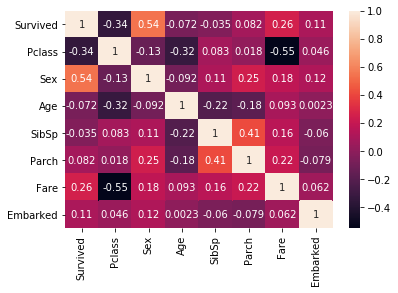

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(titanic_final.corr(),annot=True)
plt.show()

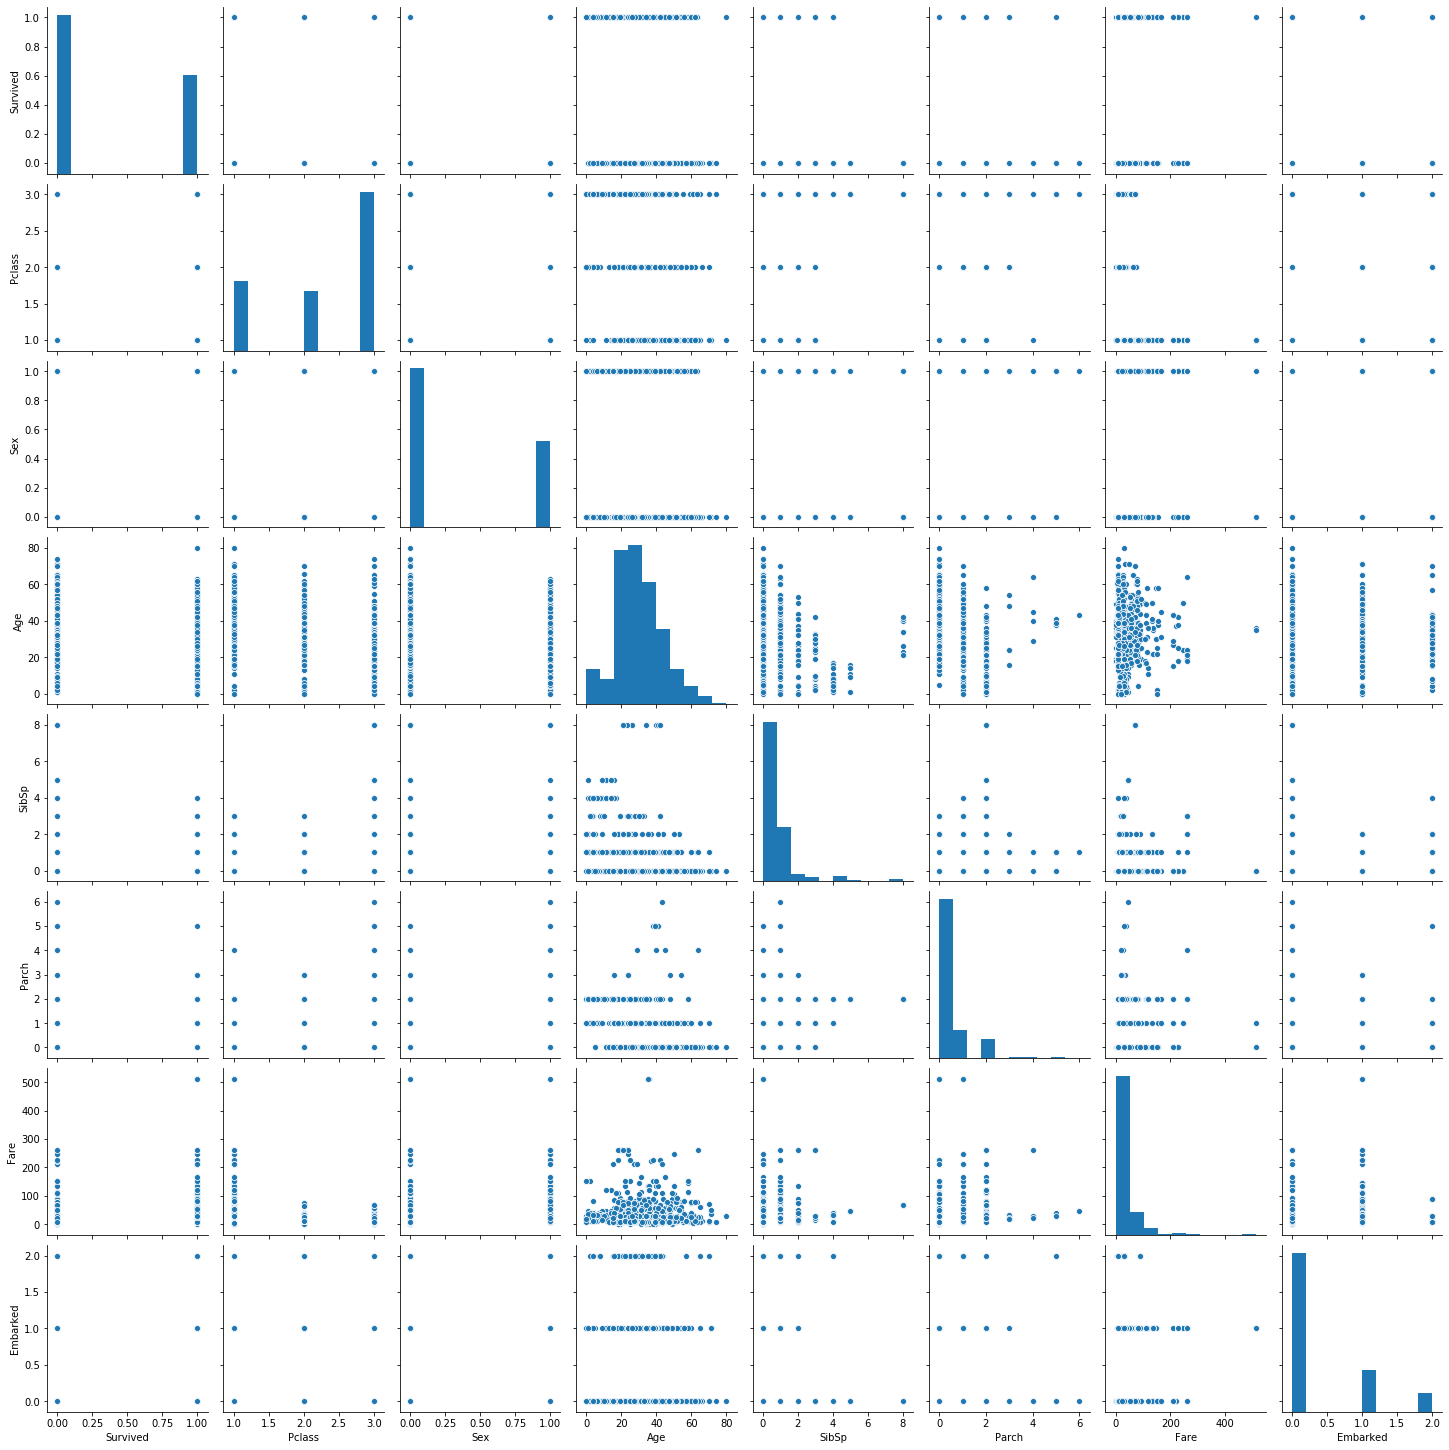

In [23]:
import seaborn as sns
sns.pairplot(titanic_final)

In [35]:
# separating the input and output/target variables
import numpy as np
x=titanic_final.drop(columns=['Survived'],axis=1)
y=titanic_final[['Survived']]

print(x.shape)
print(y.shape)

(891, 7)
(891, 1)


In [44]:
#dividing the train and test dataset
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=43,stratify=y)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(712, 7) (179, 7)
(712, 1) (179, 1)


In [67]:
#defining the models which will be used for model building
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.svm import SVC
sv=SVC()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 3)
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=240,random_state=49)

In [68]:
#appending all the models
models=[]
models.append(('LogisticRegression',lr))
models.append(('SVC',sv))
models.append(('KNeighborsClassifier',knn))
models.append(('DecisionTreeClassifier',dtc))
models.append(('GaussianNB',gnb))
models.append(('MultinomialNB',mnb))
models.append(('RandomForestClassifier',rf))

In [69]:
#lets import all the classification outputs
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

************************ LogisticRegression **********************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score: 0.8100558659217877


Cross Value Score: 0.7946192259675406


roc_auc_score: 0.7914361001317525


Classification Report:               precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



Confusion Matrix:
 [[96 14]
 [20 49]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************************ SVC **********************


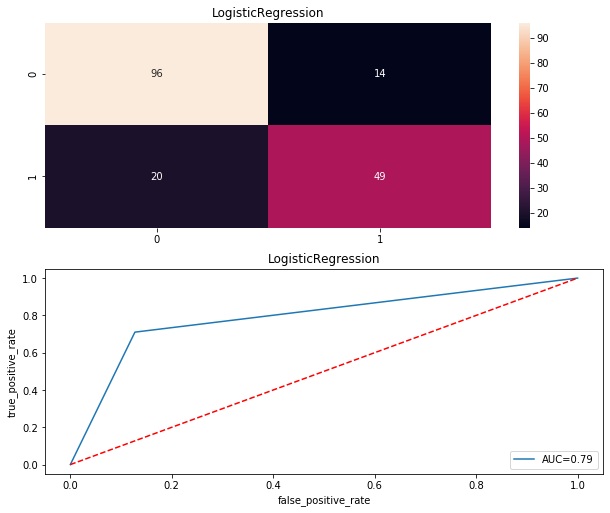

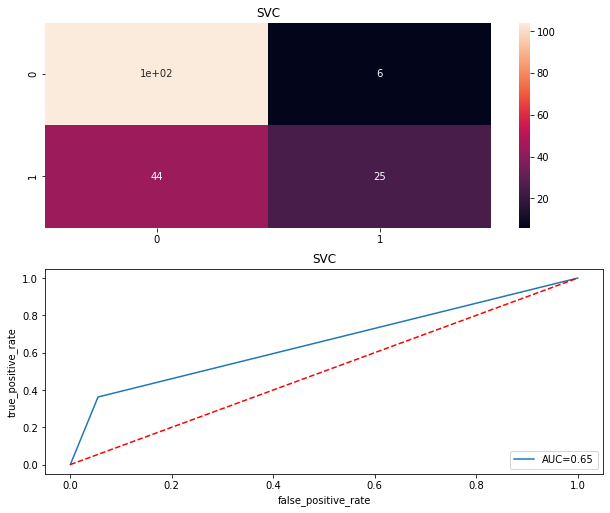

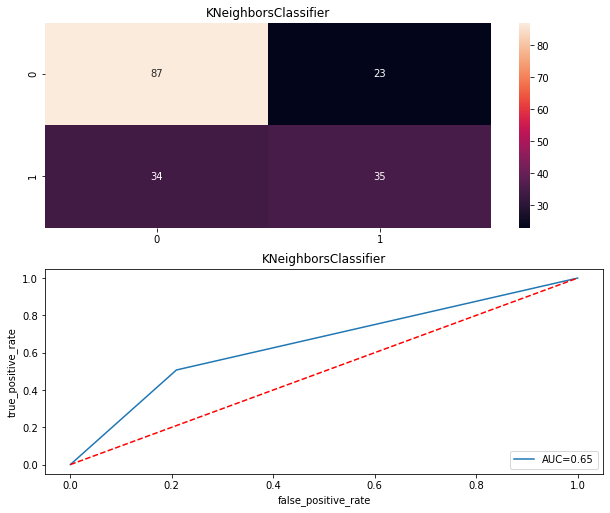

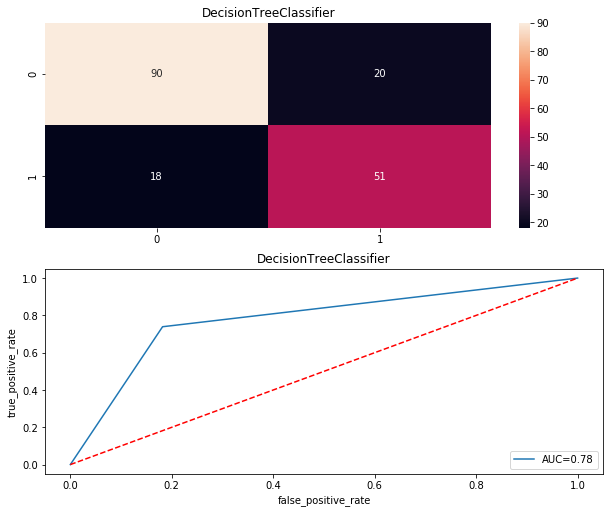

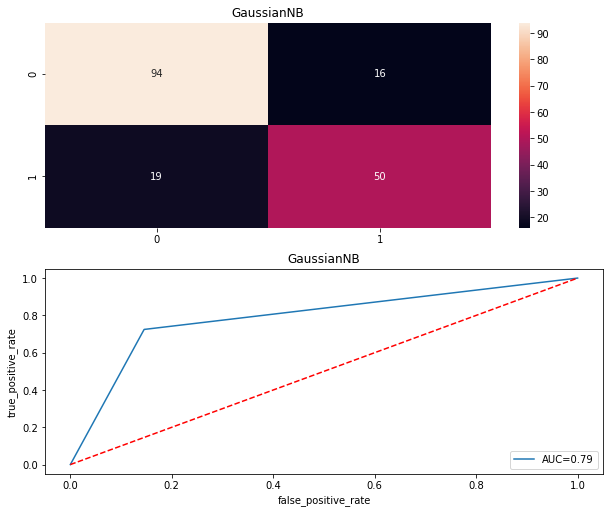

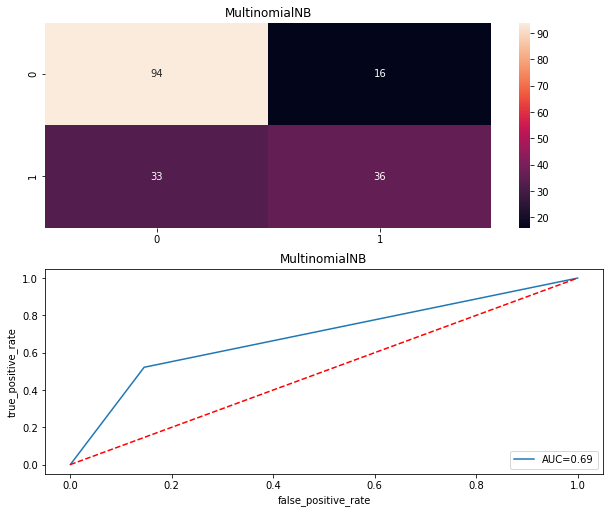

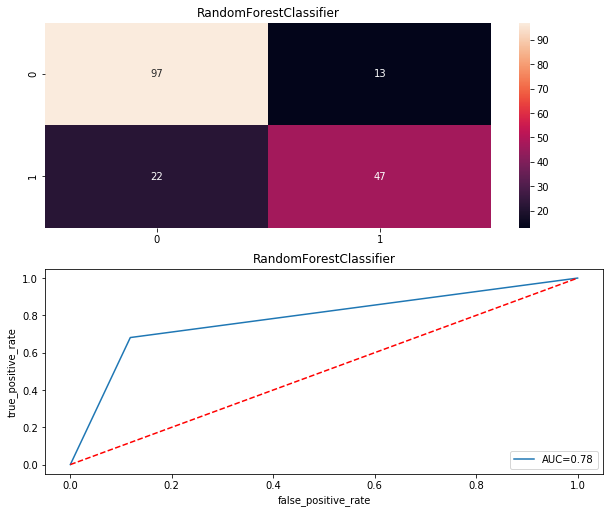

In [70]:
#printing the output of each model
Model=[]
score=[]
cvs=[]
rocscore=[]
for name, model in models:
    print('************************',name,'**********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    print('Accuracy Score:',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model, x,y,cv=10,scoring='accuracy').mean()
    print('Cross Value Score:',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, threshold= roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score:',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    cr=classification_report(y_test,pred)
    print('Classification Report:',cr )
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('Confusion Matrix:\n',cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('true_positive_rate')
    plt.xlabel('false_positive_rate')
    print('\n\n')
       
    

In [71]:
#lets print the final result of all the models
result=pd.DataFrame({'Model':Model,'Accuracy_Score':score,'Cross_Value_Score':cvs,'Roc_Auc_Curve':rocscore})
print(result)

                    Model  Accuracy_Score  Cross_Value_Score  Roc_Auc_Curve
0      LogisticRegression       81.005587          79.461923      79.143610
1                     SVC       72.067039          68.022472      65.388669
2    KNeighborsClassifier       68.156425          67.907615      64.907773
3  DecisionTreeClassifier       78.770950          77.113608      77.865613
4              GaussianNB       80.446927          78.789014      78.959157
5           MultinomialNB       72.625698          69.373283      68.814229
6  RandomForestClassifier       80.446927          80.588015      78.148880


In [72]:
#so here by looking to all model Logistic Regression is the best model, so we will fianalise this model
#so saving the final model
from sklearn.externals import joblib
#save the model as joblib in a file
joblib.dump(lr,'lr_titanic.obj')

['lr_titanic.obj']

In [73]:
# load the model from the file
lr_from_joblib=joblib.load('lr_titanic.obj')

In [74]:
#Use the loaded model to make predictions
lr_from_joblib.predict(x_test)

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)